# <center>CROP RECOMMENDATION USING WEATHER AND SOIL CONTENT</center>
<center><img src= "https://media.nationalgeographic.org/assets/photos/120/983/091a0e2f-b93d-481b-9a60-db520c87ec33.jpg" alt ="Titanic" style='width:500px;'></center><br>


- ### *Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.*

 
- ### *Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.*


- ###  *Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!*

In [4]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 512.1 kB/s eta 0:00:001m441.4 kB/s eta 0:00:01


In [2]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("siddharthss/crop-recommendation-dataset")

print("✅ Dataset downloaded at:", path)


/home/kashif/miniconda3/envs/ds/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Dataset downloaded at: /home/kashif/.cache/kagglehub/datasets/siddharthss/crop-recommendation-dataset/versions/1


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle


## **Load the Dataset**

In [4]:
import os

# Construct full file path
csv_file = os.path.join(path, "Crop_recommendation.csv")  # Note: Check exact filename if needed

# Load into DataFrame
df = pd.read_csv(csv_file)

# Show the first few rows
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## **Prepare Data**

In [6]:
# Features and Target
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']               # Target crop label


In [7]:
print(X.shape)  # This will show (rows, columns)
print(X.columns)  # To see the column names used


(2200, 7)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


## **Data Visualization**

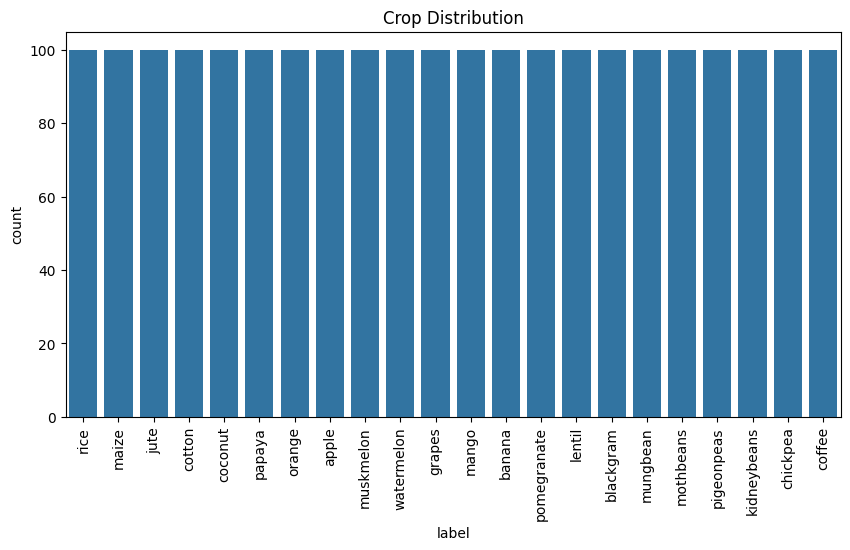

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()


## **Correlation Matrix**

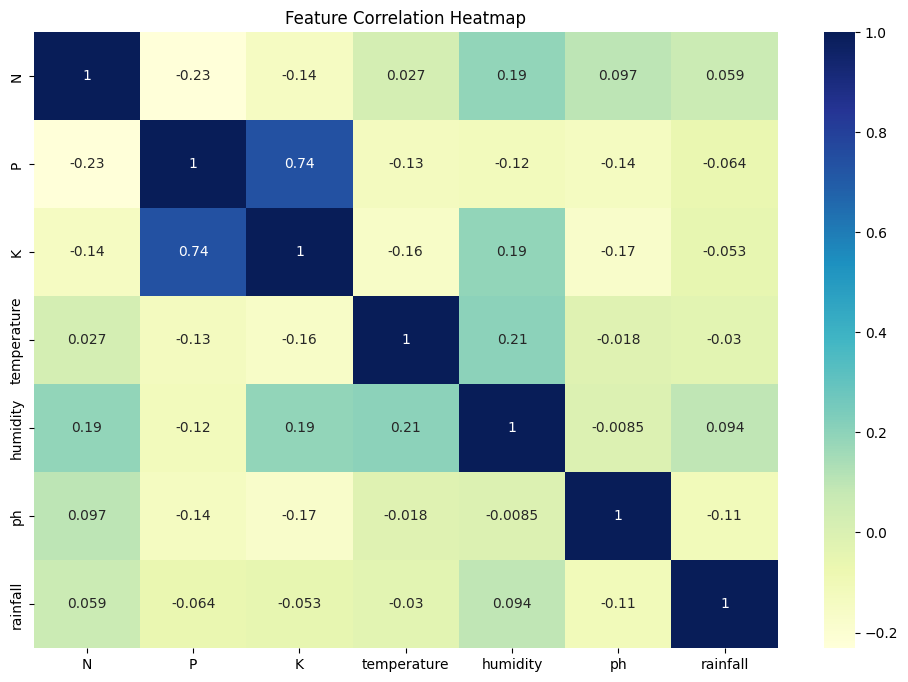

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()



## **Split Dataset**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 1760
Testing samples: 440


## **Train the Model**

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Evaluate the Model**

In [12]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

## **Model Evaluation: Confusion Matrix**

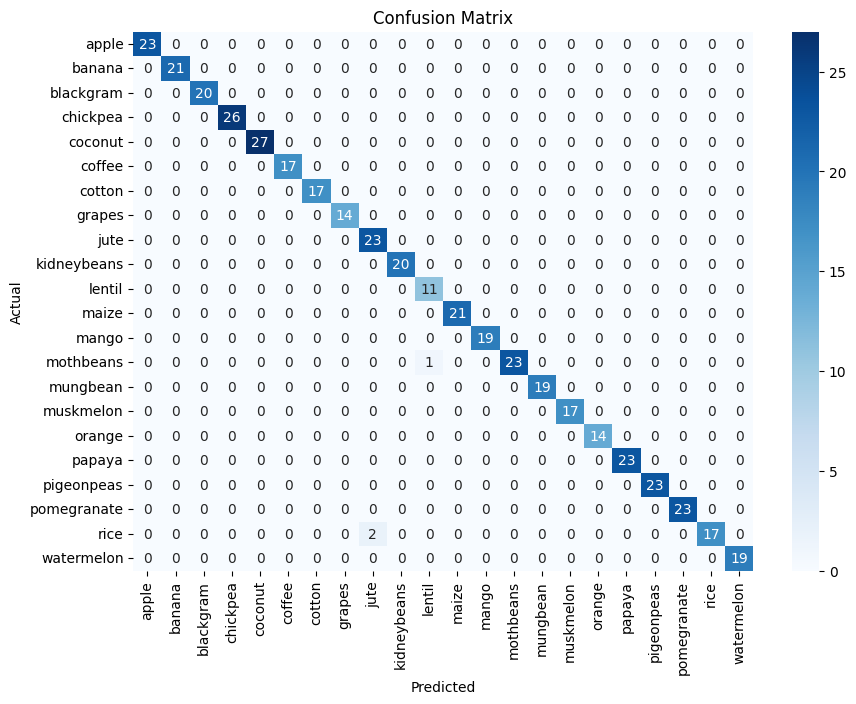

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## **Save the Model for Web App**

In [14]:
# Save model as a pickle file
with open("model/crop_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as crop_model.pkl")


✅ Model saved as crop_model.pkl


In [15]:
import pickle
import numpy as np

# Load the saved model
with open("model/crop_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example input (new crop conditions)
sample = np.array([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]])

# Predict the crop
prediction = loaded_model.predict(sample)
print("🌾 Predicted crop:", prediction[0])


🌾 Predicted crop: rice


/home/kashif/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
import pickle
import numpy as np

# Load the saved model
with open("model/crop_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example input (new crop conditions)
sample = np.array([[25, 15, 20, 30.5, 60.0, 6.8, 100.0]])

# Predict the crop
prediction = loaded_model.predict(sample)
print("🌾 Predicted crop:", prediction[0])


🌾 Predicted crop: mango


/home/kashif/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
import pickle
import numpy as np

# Load the saved model
with open("model/crop_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example input (new crop conditions)
sample = np.array([[100, 40, 40, 22.0, 80.0, 6.4, 250.0]])

# Predict the crop
prediction = loaded_model.predict(sample)
print("🌾 Predicted crop:", prediction[0])


🌾 Predicted crop: rice


/home/kashif/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
